In [8]:
!pip install xlrd


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue       

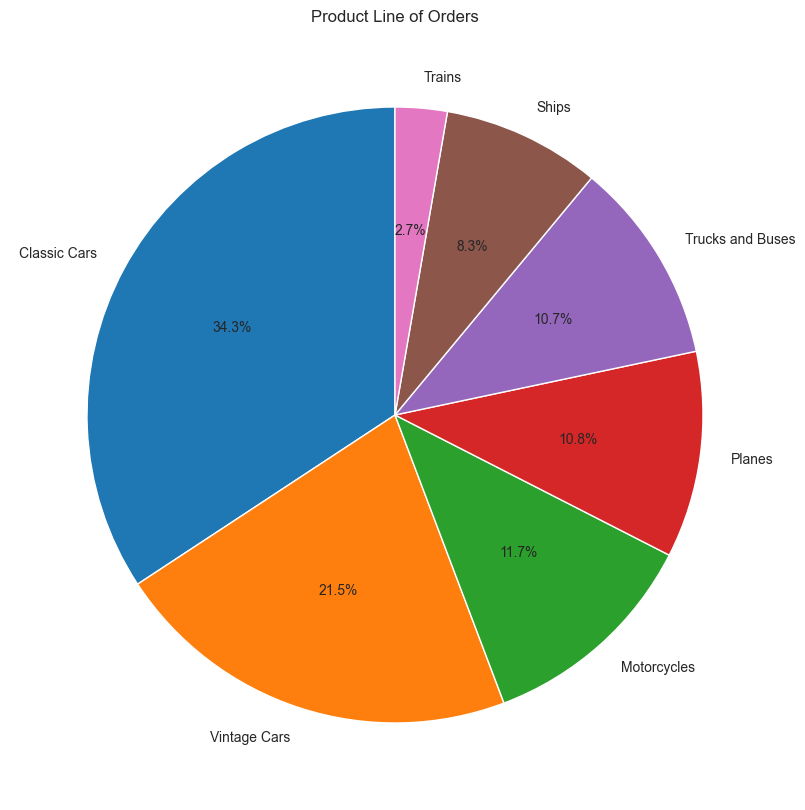

Sum of sales: 10032628.85
Max sale amount: 14082.8
Min sale amount: 482.13


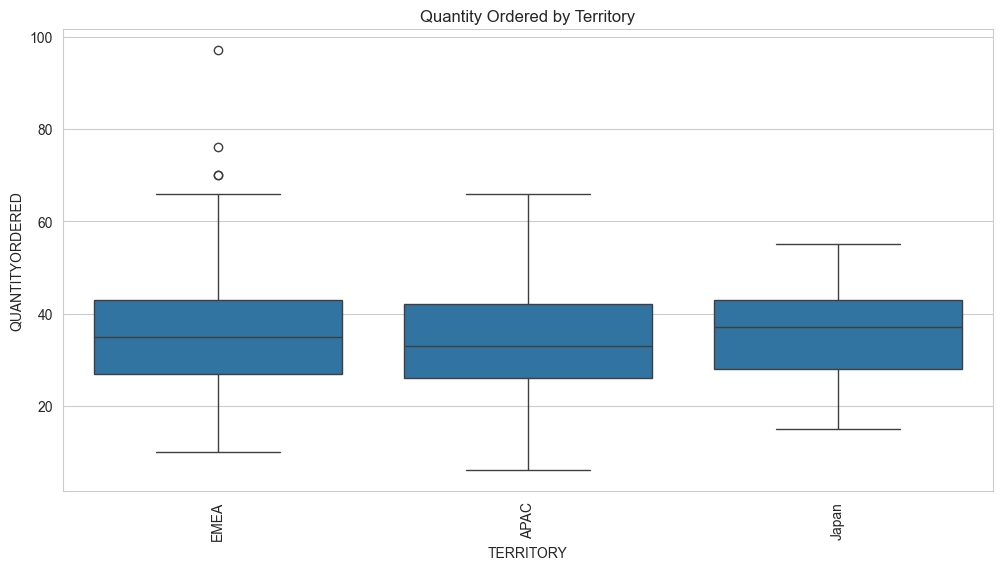

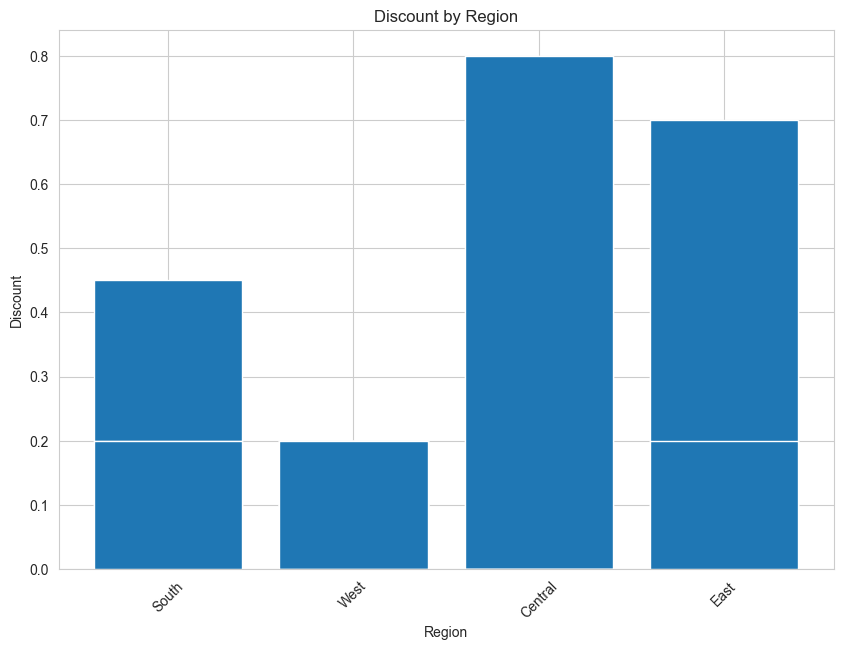

<IPython.core.display.JSON object>

Index(['sales'], dtype='object')


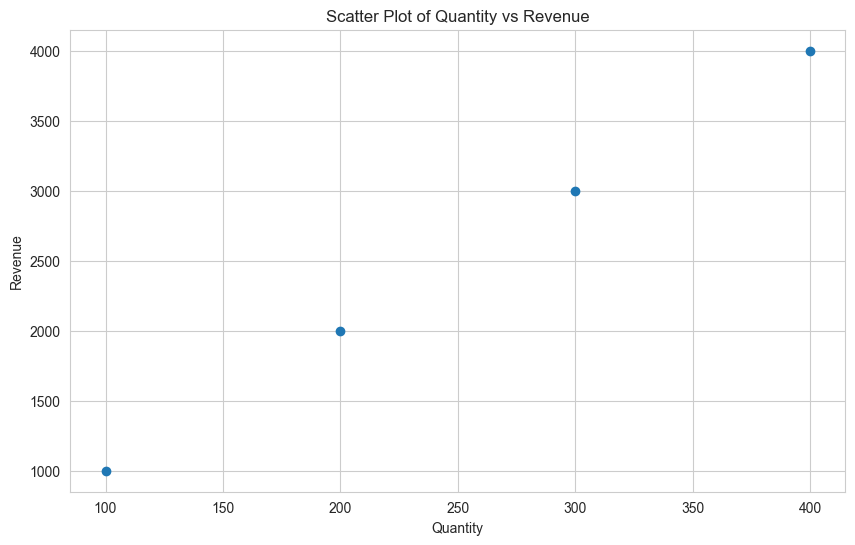

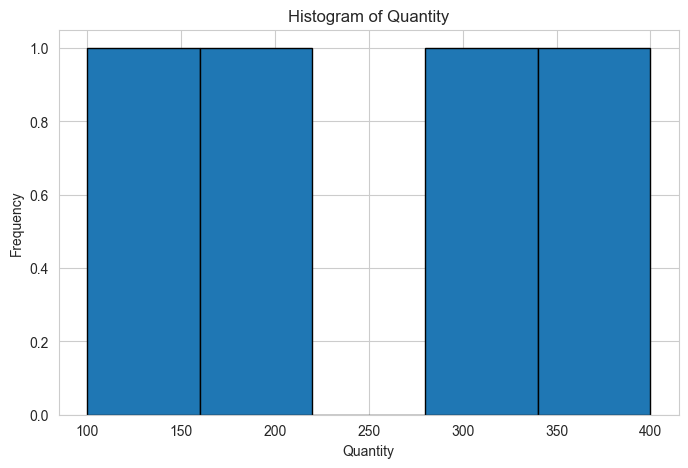

In [7]:
!pip install xlrd

# Install necessary libraries (run this in the terminal if needed)
# !pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from IPython.display import display, JSON

# 1. Load and clean the CSV data

# Load CSV data with specified encoding
df = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
print(df.head())

# Drop duplicate rows
df = df.drop_duplicates()

# Remove rows with missing values in 'PRODUCTLINE'
df = df.dropna(subset=['PRODUCTLINE'])

# 2. Pie chart of orders by product line

# Prepare data for pie chart
data_pie = df['PRODUCTLINE'].value_counts().rename_axis('PRODUCTLINE').reset_index(name='orders')

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(data_pie['orders'], labels=data_pie['PRODUCTLINE'], startangle=90, autopct='%.1f%%')
plt.title('Product Line of Orders')
plt.show()

# 3. Basic sales statistics

# Calculate sum, max, and min of the 'SALES' column
sum_sales = df['SALES'].sum()
max_sales = df['SALES'].max()
min_sales = df['SALES'].min()

print('Sum of sales:', sum_sales)
print('Max sale amount:', max_sales)
print('Min sale amount:', min_sales)

# 4. Boxplot of quantity ordered by territory

# Set seaborn style
sns.set_style("whitegrid")

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='TERRITORY', y='QUANTITYORDERED', data=df)
plt.title('Quantity Ordered by Territory')
plt.xticks(rotation=90)
plt.show()

# 5. Load and display Excel data

# Load Excel file

excel_file = pd.read_excel('Sample - Superstore.xls')
excel_df = pd.DataFrame(excel_file)

# Prepare data for bar plot
name = excel_df['Region'].head(42)
price = excel_df['Discount'].head(42)

# Plot bar chart
plt.figure(figsize=(10, 7))
plt.bar(name[:30], price[:30])
plt.title('Discount by Region')
plt.xlabel('Region')
plt.ylabel('Discount')
plt.xticks(rotation=45)
plt.show()

# 6. Load JSON data and convert to DataFrame

# Load JSON file
json_file = 'sales.json'  # Replace with your JSON file name
with open(json_file, 'r') as f:
    data = json.load(f)

# Display JSON data in Jupyter Notebook (if applicable)
display(JSON(data))

# Convert JSON data to DataFrame
df_json = pd.json_normalize(data)
print(df_json.columns)

# 7. Scatter plot of quantity vs revenue

# Convert JSON sales data to DataFrame
df_sales = pd.DataFrame(data['sales'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sales['quantity'], df_sales['revenue'])
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Quantity vs Revenue')
plt.show()

# 8. Histogram of quantity

# Histogram
plt.figure(figsize=(8, 5))
plt.hist(df_sales['quantity'], bins=5, edgecolor='black')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

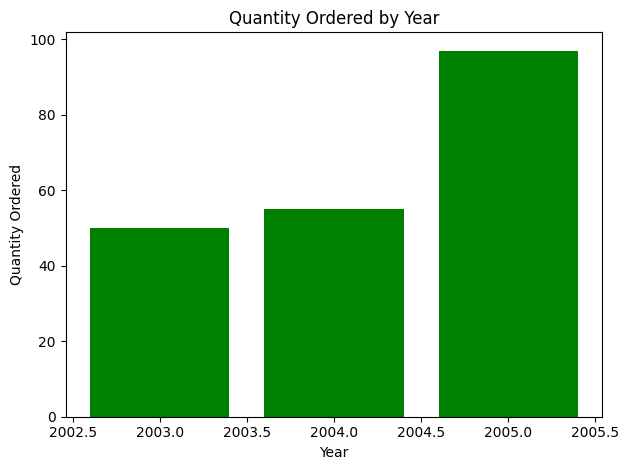

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
0 2003-02-24  Shipped       1         2     2003  ...            0   
1 2003-05-07  Shipped       2         5     2003  ...            0   
2 2003-07-01  Shipped       3         7     2003  ...            0   
3 2003-08-25  Shipped       3         8     2003  ...            0   
4 2003-10-10  Shipped       4        10     2003  ...            0   

            CITY STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0            NYC    NY      10022     USA         0              Yu   
1   

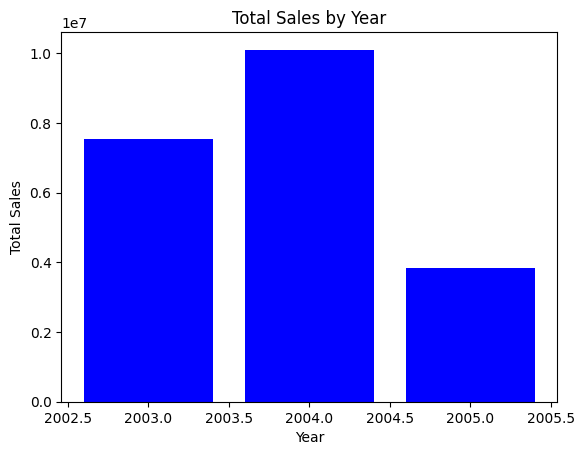

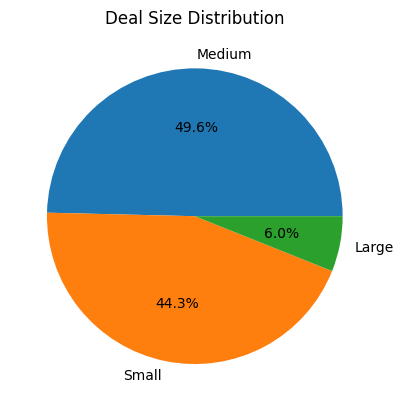

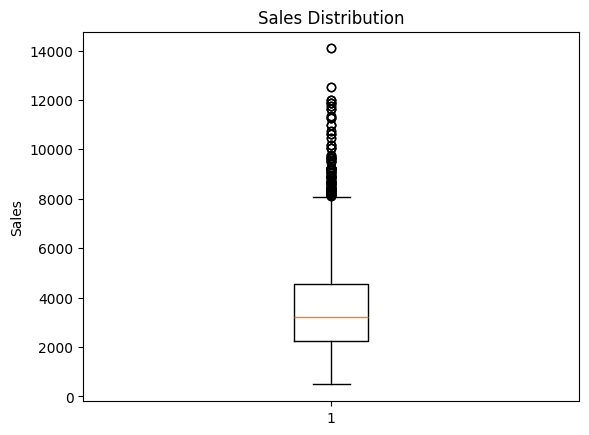

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from different file formats
csv_data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
excel_data = pd.read_excel('sales_data_sample.xlsx')
json_data = pd.read_json('myData.json')

# Explore the structure and content of CSV
print(csv_data.head())
print(csv_data.info())
print(csv_data.describe())
print(csv_data.isnull().sum())

# Explore the structure and content of Excel
print(excel_data.head())
print(excel_data.info())
print(excel_data.describe())
print(excel_data.isnull().sum())

# Explore the structure and content of JSON
print(json_data.head())
print(json_data.info())
print(json_data.describe())
print(json_data.isnull().sum())

# Handle missing values by filling with mean or dropping rows
csv_data.fillna(0, inplace=True)  # For numerical columns
csv_data.dropna(inplace=True)  # Drop rows with missing values in a specific column
print(csv_data.isnull().sum())

# Remove duplicates
csv_data.drop_duplicates(inplace=True)

# Convert 'ORDERDATE' to datetime format
csv_data['ORDERDATE'] = pd.to_datetime(csv_data['ORDERDATE'], errors='coerce')

# Remove duplicate rows based on 'ORDERNUMBER'
csv_data.drop_duplicates(subset='ORDERNUMBER', inplace=True)

print(csv_data.head())

# Concatenate the dataframes
all_data = pd.concat([csv_data, excel_data, json_data], ignore_index=True)

# Check the structure of the combined dataframe
print(all_data.head())

# Filter for sales greater than 5000
high_sales = all_data[all_data['SALES'] > 5000]
print(high_sales)

# Create a bar plot for YEAR_ID and QUANTITYORDERED
plt.bar(all_data['YEAR_ID'], all_data['QUANTITYORDERED'], color='green')
plt.xlabel('Year')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Year')
plt.tight_layout()
plt.show()

# Extract useful information (e.g., year from ORDERDATE if necessary)
all_data['ORDERDATE'] = pd.to_datetime(all_data['ORDERDATE'])
all_data['YEAR'] = all_data['ORDERDATE'].dt.year

print(all_data.head())

# Total sales
total_sales = all_data['SALES'].sum()
print(f'Total Sales: {total_sales}')

# Average order value
avg_order_value = all_data['SALES'].mean()
print(f'Average Order Value: {avg_order_value}')

# Group data by 'YEAR' and calculate total sales for each year
sales_by_year = all_data.groupby('YEAR')['SALES'].sum().reset_index()

# Create a bar plot for total sales by year
plt.bar(sales_by_year['YEAR'], sales_by_year['SALES'], color='blue')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.show()

# Create a pie chart for deal size distribution
all_data['DEALSIZE'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Deal Size Distribution')
plt.ylabel('')  # Remove the default ylabel for a cleaner look
plt.show()

# Create a box plot for sales
plt.boxplot(all_data['SALES'])
plt.ylabel('Sales')
plt.title('Sales Distribution')
plt.show()


Certainly! Here’s the breakdown:

1. **Loading Data**:
   - The code loads three datasets in different formats (CSV, Excel, and JSON). For the CSV file, it uses a specific encoding (`ISO-8859-1`) to avoid errors when there are special characters in the text.

2. **Data Exploration**:
   - The code displays the first few rows, structure, summary statistics, and any missing values for each dataset (CSV, Excel, and JSON) to understand their contents and identify any issues (e.g., missing values).

3. **Handling Missing Values**:
   - In the CSV data, any missing values are either replaced with `0` (for numerical columns) or rows with missing values are dropped entirely to ensure data completeness.

4. **Removing Duplicates**:
   - Duplicate rows are removed from the CSV data, with special attention to rows with identical order numbers (`ORDERNUMBER` column) to ensure unique orders.

5. **Date Conversion**:
   - The `ORDERDATE` column is converted to a `datetime` format, which allows for better date-related operations like extracting the year.

6. **Combining Data**:
   - The three datasets (CSV, Excel, and JSON) are merged into one comprehensive DataFrame. This combined dataset is used for further analysis.

7. **Filtering Data**:
   - The combined data is filtered to include only sales above a certain threshold (e.g., greater than 5000), enabling analysis on high-value sales.

8. **Data Visualization**:
   - A bar plot visualizes `YEAR_ID` against `QUANTITYORDERED` to see how orders vary by year.
   - A pie chart shows the distribution of deal sizes (e.g., small, medium, large), illustrating the proportion of different deal types.
   - A box plot for `SALES` helps identify the spread and outliers in sales data.

9. **Extracting Additional Information**:
   - The year is extracted from the `ORDERDATE` column, allowing for annual analysis in later steps.

10. **Sales Analysis**:
    - Total sales and average order values are calculated to get a high-level understanding of revenue and customer spending patterns.

11. **Yearly Sales Visualization**:
    - Another bar plot visualizes total sales by year, making it easy to see trends over time.

In summary, the code combines and cleans data from multiple sources, explores and visualizes sales and order trends, and performs specific analyses to understand high-level insights and distributions within the data.

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

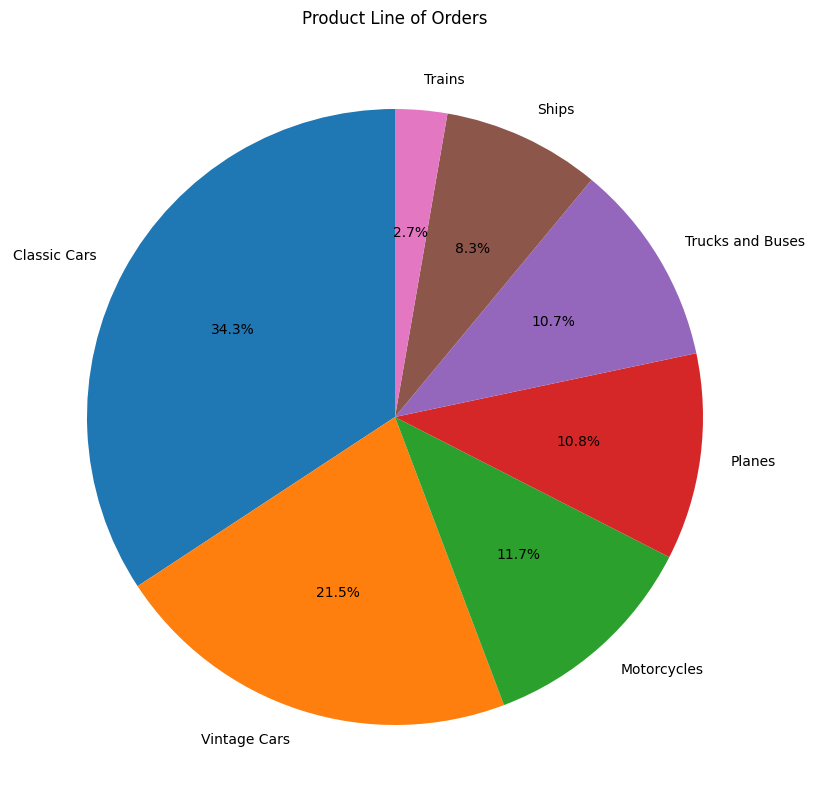

Sum of sales: 10032628.85
Max sale amount: 14082.8
Min sale amount: 482.13


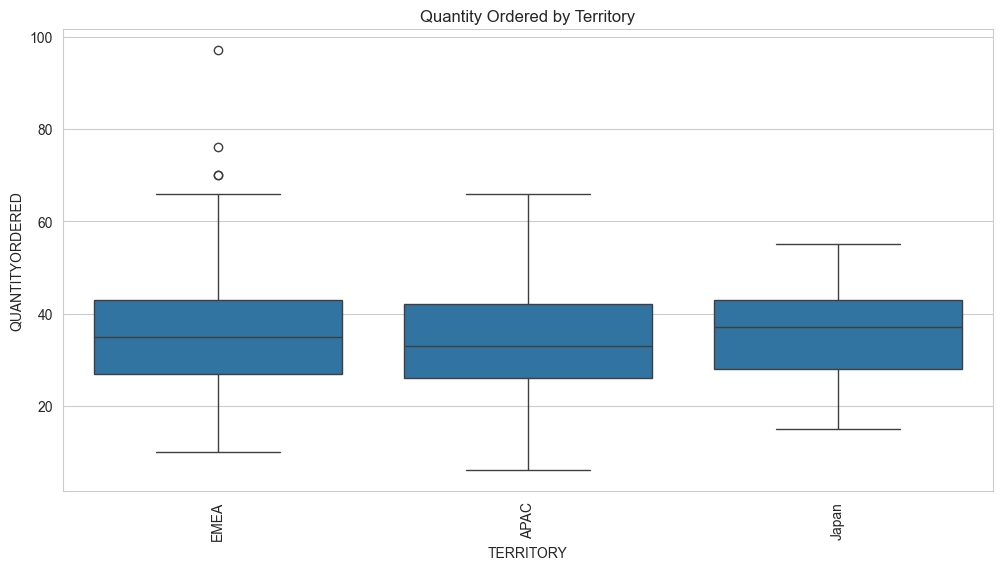

In [ ]:
!pip install xlrd

# Install necessary libraries (run this in the terminal if needed)
# !pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from IPython.display import display, JSON

# 1. Load and clean the CSV data

# Load CSV data with specified encoding
df = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
print(df.head())

# Drop duplicate rows
df = df.drop_duplicates()

# Remove rows with missing values in 'PRODUCTLINE'
df = df.dropna(subset=['PRODUCTLINE'])

# 2. Pie chart of orders by product line

# Prepare data for pie chart
data_pie = df['PRODUCTLINE'].value_counts().rename_axis('PRODUCTLINE').reset_index(name='orders')

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(data_pie['orders'], labels=data_pie['PRODUCTLINE'], startangle=90, autopct='%.1f%%')
plt.title('Product Line of Orders')
plt.show()

# 3. Basic sales statistics

# Calculate sum, max, and min of the 'SALES' column
sum_sales = df['SALES'].sum()
max_sales = df['SALES'].max()
min_sales = df['SALES'].min()

print('Sum of sales:', sum_sales)
print('Max sale amount:', max_sales)
print('Min sale amount:', min_sales)

# 4. Boxplot of quantity ordered by territory

# Set seaborn style
sns.set_style("whitegrid")

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='TERRITORY', y='QUANTITYORDERED', data=df)
plt.title('Quantity Ordered by Territory')
plt.xticks(rotation=90)
plt.show()

# 5. Load and display Excel data

# Load Excel file

excel_file = pd.read_excel('Sample - Superstore.xls')
excel_df = pd.DataFrame(excel_file)

# Prepare data for bar plot
name = excel_df['Region'].head(42)
price = excel_df['Discount'].head(42)

# Plot bar chart
plt.figure(figsize=(10, 7))
plt.bar(name[:30], price[:30])
plt.title('Discount by Region')
plt.xlabel('Region')
plt.ylabel('Discount')
plt.xticks(rotation=45)
plt.show()

# 6. Load JSON data and convert to DataFrame

# Load JSON file
json_file = 'sales.json'  # Replace with your JSON file name
with open(json_file, 'r') as f:
    data = json.load(f)

# Display JSON data in Jupyter Notebook (if applicable)
display(JSON(data))

# Convert JSON data to DataFrame
df_json = pd.json_normalize(data)
print(df_json.columns)

# 7. Scatter plot of quantity vs revenue

# Convert JSON sales data to DataFrame
df_sales = pd.DataFrame(data['sales'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sales['quantity'], df_sales['revenue'])
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Quantity vs Revenue')
plt.show()

# 8. Histogram of quantity

# Histogram
plt.figure(figsize=(8, 5))
plt.hist(df_sales['quantity'], bins=5, edgecolor='black')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()
